Dataset Overview:
       Amount  Class
0  124.835708      0
1   93.086785      0
2  132.384427      0
3  176.151493      0
4   88.292331      0
             Amount         Class
count  10000.000000  10000.000000
mean      99.893201      0.011600
std       50.173119      0.107082
min      -96.120013      0.000000
25%       66.370473      0.000000
50%       99.870251      0.000000
75%      133.554044      0.000000
max      296.311885      1.000000


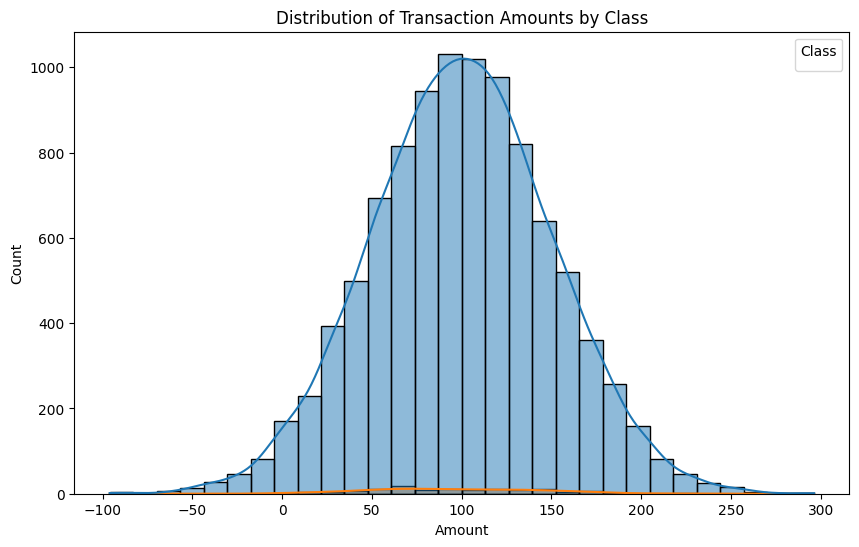

Logistic Regression Accuracy: 0.9865
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1973
           1       0.00      0.00      0.00        27

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000

Logistic Regression Confusion Matrix:
[[1973    0]
 [  27    0]]
Decision Trees Accuracy: 0.971
Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1973
           1       0.00      0.00      0.00        27

    accuracy                           0.97      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.97      0.97      0.97      2000

Decision Trees Confusion Matrix:
[[1942   31]
 [  27    0]]
Random Forests Accuracy: 0.971
Random Forests Classification Report:
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forests AUC Score: 0.48895271348388425


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data for credit card transactions
num_transactions = 10000

# Randomly generate transaction amounts
amounts = np.random.normal(loc=100, scale=50, size=num_transactions)

# Randomly generate transaction classes (0 for legitimate, 1 for fraudulent)
fraud_prob = 0.01  # Assuming 1% of transactions are fraudulent
classes = np.random.choice([0, 1], size=num_transactions, p=[1-fraud_prob, fraud_prob])

# Create a DataFrame
data = pd.DataFrame({'Amount': amounts, 'Class': classes})

# Data analysis
print("Dataset Overview:")
print(data.head())
print(data.describe())

# Plot the distribution of transaction amounts by class
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', hue='Class', bins=30, kde=True)
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

# Data preprocessing
# Splitting the dataset into features (X) and target variable (y)
X = data[['Amount']]
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Random Forests
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Model Evaluation
# Logistic Regression
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Decision Trees
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Trees Accuracy:", accuracy_dt)
print("Decision Trees Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Trees Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Random Forests
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forests Accuracy:", accuracy_rf)
print("Random Forests Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forests Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Model Evaluation Metrics: AUC score
# Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print("Logistic Regression AUC Score:", auc_lr)

# Decision Trees
y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print("Decision Trees AUC Score:", auc_dt)

# Random Forests
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("Random Forests AUC Score:", auc_rf)


In [2]:
# Create a DataFrame to store model performance metrics
performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forests'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'AUC Score': [auc_lr, auc_dt, auc_rf]
})

# Display the performance table
print("Model Performance Metrics:")
print(performance_df)


Model Performance Metrics:
                 Model  Accuracy  AUC Score
0  Logistic Regression    0.9865   0.512324
1       Decision Trees    0.9710   0.492144
2       Random Forests    0.9710   0.488953
